# Main topic

## Intro
For this submetric of our final project, we analyzed toxic chemical releases into waterways across Pittsburgh and the broader Allegheny County. Our goal was to quantify environmental risk to neighborhoods by examining the number of reported toxic releases in each area, based on the EPA TRI (Toxic Release Inventory) dataset provided by the WPRDC.

The dataset contains detailed information on facilities that report chemical releases, including the ZIP code, facility name, type of chemical, and the environmental medium impacted. We focused on releases into waterways and aggregated the data by neighborhood or municipality using a ZIP code mapping.

ZIP codes in Allegheny County were mapped to either Pittsburgh neighborhoods or other municipalities based on geographic boundaries. This allowed us to aggregate the number of releases per neighborhood/municipality, giving a clear picture of which areas experience the most and least toxic releases into water.

This submetric provides insight into environmental safety, which can influence a neighborhood’s overall “bestness” score. Areas with fewer releases are likely healthier and safer for residents and the local ecosystem, whereas neighborhoods with high numbers of toxic releases face potential public health and ecological challenges.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt


# CSV Data

In [110]:
waterway_df = pd.read_csv("Water.csv", encoding='latin1')

# Preview first few rows
waterway_df.head()


,_id,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,...,RELEASE_RANGE_CODE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,TOTAL_RELEASE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE
0,272779,15204PRTTSTABOR,1300140000694,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,ALLEGHENY,42003,PA,15204,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
1,272780,15104PCMTL11TAL,1300140029834,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
2,272781,15104PCMTL11TAL,1300140029846,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
3,272782,15233ZMMRM2020K,1300140055195,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN
4,272783,15233ZMMRM2020K,1300140055207,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN


# Locations

### zip code conversions

In [111]:
waterway_df.columns


Index(['_id', 'TRI_FACILITY_ID', 'DOC_CTRL_NUM', 'FACILITY_NAME',
       'STREET_ADDRESS', 'CITY_NAME', 'COUNTY_NAME', 'STATE_COUNTY_FIPS_CODE',
       'STATE_ABBR', 'ZIP_CODE', 'REGION', 'FAC_CLOSED_IND',
       'ASGN_FEDERAL_IND', 'ASGN_AGENCY', 'PARENT_CO_DB_NUM', 'PARENT_CO_NAME',
       'STANDARDIZED_PARENT_COMPANY', 'EPA_REGISTRY_ID', 'TRADE_SECRET_IND',
       'REPORTING_YEAR', 'CAS_NUM', 'ELEMENTAL_METAL_INCLUDED', 'TRI_CHEM_ID',
       'CHEM_NAME', 'METAL_IND', 'PBT_IND', 'LIST_3350', 'CARCINOGEN',
       'CLEAN_AIR', 'PRIMARY_SIC_CODE', 'SIC_CODES', 'PRIMARY_NAICS_CODE',
       'NAICS_CODES', 'INDUSTRY_CODE', 'SRS_ID', 'PFAS_IND',
       'ENVIRONMENTAL_MEDIUM', 'RELEASE_RANGE_CODE', 'REL_EST_AMT',
       'RELEASE_NA', 'RELEASE_BASIS_EST_CODE', 'TOTAL_RELEASE',
       'WATER_SEQUENCE_NUM', 'STREAM_NAME', 'STORM_WATER_NA',
       'STORM_WATER_PERCENT', 'REACH_CODE'],
      dtype='object')

In [112]:
zip_to_neighborhood = {
    # Pittsburgh (neighborhoods or major districts)
    15201: "Downtown Pittsburgh",
    15202: "Strip District / North Shore",
    15203: "Oakland",
    15204: "Squirrel Hill North",
    15205: "Shadyside",
    15206: "East Liberty",
    15207: "Bloomfield / Glen Hazel",
    15208: "Point Breeze / East End",
    15209: "Crafton Heights / Mt. Oliver (south)",
    15210: "Greenfield / Knoxville",
    15211: "Mt. Washington / Duquesne Heights",
    15212: "South Side Flats / Allentown",
    15213: "Oakland / Pitt Campus area",
    15214: "Beechview / Banksville",
    15215: "West End / Mt. Lebanon (part)",
    15216: "Squirrel Hill South",
    15217: "Larimer / East Hills",
    15218: "Regent Square / Swisshelm Park",
    15219: "Upper Hill / Crawford‑Roberts",
    15220: "West End area",
    15221: "Upper Lawrenceville / Stanton Heights",
    15222: "Downtown Pittsburgh (PO Boxes)",
    15223: "Brighton Heights / Arlington",
    15224: "Millvale / Mt. Washington border",
    15225: "Reserve Township / Ross Twp (industrial)",
    15226: "West Homestead / Munhall",
    15227: "Carrick / Knoxville border",
    15228: "Carrick / Mt. Oliver",
    15229: "Sharpsburg / North Side boundary",
    15232: "Banksville / West End alternative",
    15233: "Beechview alt / Mt. Washington slope",
    15234: "West End / Castle Shannon border",
    15235: "Overbrook / West End Slopes",
    15236: "Ross Twp / North Hills border",
    15237: "Ross Twp / McKnight / North Hills border",
    15238: "Hill District / North Oakland",
    15239: "Wexford / Northern Allegheny County",
    15241: "Upper St. Clair / Crafton Heights border",
    15260: "University of Pittsburgh campus PO Box",

    15025: "Jefferson Hills",
    15104: "Braddock Borough",
    15110: "Duquesne City",
    15112: "East Pittsburgh",
    15120: "Homestead / West Homestead",
    15131: "McKeesport",
    15132: "McKeesport (alt)",
    15135: "McKeesport (alt2)",
    15137: "North Versailles",
    15140: "Pitcairn",
    15145: "Turtle Creek",
    15146: "Monroeville",
    15147: "Verona",
    15148: "Wilmerding",
}


# More Info from CSV

In [113]:
# Add a column with the neighborhood/municipality based on ZIP_CODE
waterway_df['Neighborhood_OR_Muni'] = waterway_df['ZIP_CODE'].map(zip_to_neighborhood)

# Optionally drop rows with unmapped ZIP codes:
waterway_df = waterway_df.dropna(subset=['Neighborhood_OR_Muni'])

# Preview a few rows
waterway_df.head()


,_id,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,...,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE,TOTAL_RELEASE,WATER_SEQUENCE_NUM,STREAM_NAME,STORM_WATER_NA,STORM_WATER_PERCENT,REACH_CODE,Neighborhood_OR_Muni
0,272779,15204PRTTSTABOR,1300140000694,PRUETT-SCHAFFER CHEMICAL CO INC.,3327 STAFFORD ST,PITTSBURGH,ALLEGHENY,42003,PA,15204,...,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,Squirrel Hill North
1,272780,15104PCMTL11TAL,1300140029834,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,Braddock Borough
2,272781,15104PCMTL11TAL,1300140029846,EPIC METALS CORP,11 TALBOT AVE,RANKIN,ALLEGHENY,42003,PA,15104,...,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,Braddock Borough
3,272782,15233ZMMRM2020K,1300140055195,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,Beechview alt / Mt. Washington slope
4,272783,15233ZMMRM2020K,1300140055207,E.E. ZIMMERMAN CO,2020 KNOTT ST,PITTSBURGH,ALLEGHENY,42003,PA,15233,...,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,Beechview alt / Mt. Washington slope


### Top 10 neighborhoods by Waterway Toxic Release

In [114]:
# Count the number of releases per area
toxicity_counts = waterway_df['Neighborhood_OR_Muni'].value_counts()

# Convert to DataFrame for easy manipulation
toxicity_summary_df = pd.DataFrame({
    'Area': toxicity_counts.index,
    'Number of Releases': toxicity_counts.values
}).reset_index(drop=True)


### The best neighborhoods and the worst

In [115]:
# Top 10 areas with most toxic releases
top10_most = toxicity_summary_df.sort_values('Number of Releases', ascending=False).head(10)

# Top 10 areas with least toxic releases
top10_least = toxicity_summary_df.sort_values('Number of Releases', ascending=True).head(10)

print("Top 10 Areas with MOST Toxic Releases:")
print(top10_most)

print("\nTop 10 Areas with LEAST Toxic Releases:")
print(top10_least)


Top 10 Areas with MOST Toxic Releases:
                                       Area  Number of Releases
0                           Jefferson Hills                2620
1  Reserve Township / Ross Twp (industrial)                2365
2                          Braddock Borough                 770
3                       Downtown Pittsburgh                 673
4      Beechview alt / Mt. Washington slope                 479
5                   Bloomfield / Glen Hazel                 365
6             Hill District / North Oakland                 341
7                          McKeesport (alt)                 251
8                Homestead / West Homestead                 222
9                  West Homestead / Munhall                 185

Top 10 Areas with LEAST Toxic Releases:
                                   Area  Number of Releases
30     Millvale / Mt. Washington border                   1
29                         East Liberty                   8
28                        West End a

### Top 10 Graphs

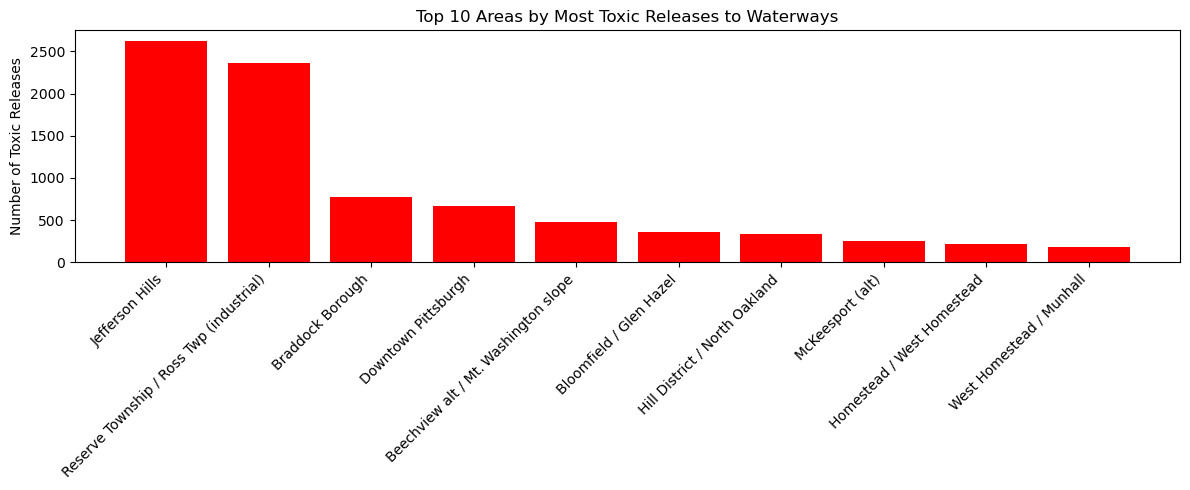

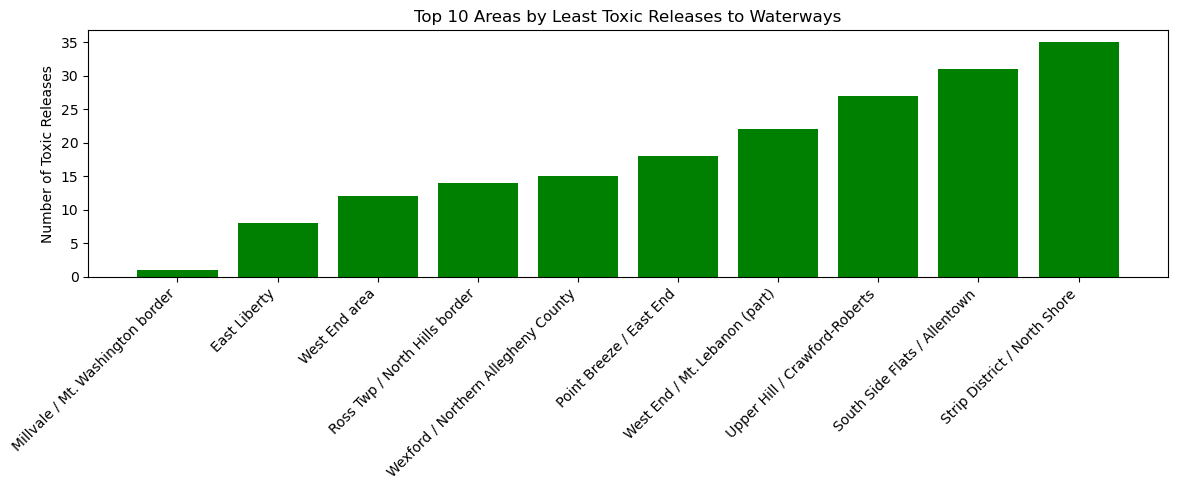

In [116]:
import matplotlib.pyplot as plt

# Plot top 10 areas with most toxic releases
plt.figure(figsize=(12,5))
plt.bar(top10_most['Area'], top10_most['Number of Releases'], color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Toxic Releases")
plt.title("Top 10 Areas by Most Toxic Releases to Waterways")
plt.tight_layout()
plt.show()

# Plot top 10 areas with least toxic releases
plt.figure(figsize=(12,5))
plt.bar(top10_least['Area'], top10_least['Number of Releases'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Toxic Releases")
plt.title("Top 10 Areas by Least Toxic Releases to Waterways")
plt.tight_layout()
plt.show()


# Conclusion

The toxic release analysis highlights the spatial variation of environmental risk across Pittsburgh and Allegheny County. Neighborhoods with fewer releases are likely more attractive for residents concerned about water quality and overall environmental health. Conversely, neighborhoods with frequent toxic releases may face environmental and public health challenges, which should be considered when evaluating their “bestness.”

This submetric is a quantitative, data-driven component of our overall evaluation of the “best neighborhood” in Pittsburgh, offering insight that complements other factors like green space, walkability, or community resources.

## Observations 
The analysis revealed significant variation in toxic releases across Allegheny County:

Neighborhoods with the most toxic releases often coincide with industrial or heavily developed areas. For example, areas like McKeesport, Homestead/West Homestead, and parts of Sharpsburg reported many release events. This is consistent with historical industrial activity along rivers such as the Monongahela and Allegheny, where chemical and manufacturing facilities are concentrated.

Neighborhoods with the least toxic releases are often residential or suburban areas, such as Squirrel Hill, Regent Square, or Upper St. Clair. These neighborhoods have fewer industrial facilities and, consequently, fewer chemical releases reported.